Text(0, 0.5, 'target')

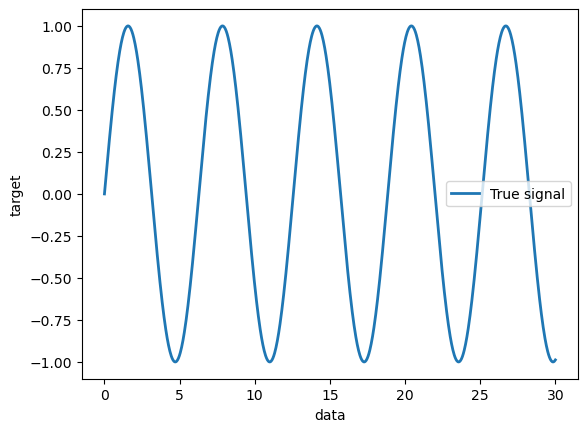

In [1]:
import numpy as np
import matplotlib.pyplot as plt


rng = np.random.RandomState(0)
data = np.linspace(0, 30, num=1000).reshape(-1, 1)
target = np.sin(data).ravel()

plt.plot(data, target, label="True signal", linewidth=2)
plt.legend()
plt.xlabel("data")
plt.ylabel("target")


[ 0.6936261  -0.40586608 -0.42837671  0.21467662 -0.41173379 -0.63987133
  0.09766551 -0.39337054 -0.39080486  0.24441215  0.63173488 -0.43884392
  0.45207314  0.20829329 -0.21376742  0.02461272  0.81710706  0.05489083
 -0.0230435  -0.24884461  0.25739311  0.49583506  1.12699701  0.5826821
  0.08614299  0.45491435  0.8514043  -0.3279768   0.10519183 -0.03176198
 -0.54248499  0.01475724 -0.67411205  0.31414677  0.72247114  0.48801373
 -0.02846696 -0.48619218 -0.76203324  0.26473948  0.27064945 -0.58700055
 -0.34378398  0.63624016  0.34343941  0.82109759 -0.27189347  0.28444905
 -0.32832519  0.41660024 -1.15856465  0.1950297   0.39266884 -0.54872883
  0.1061477   0.03873739 -0.2169028  -0.06539629 -0.018105   -1.02520042
  0.37023484 -0.04045024 -0.38396281  0.53601118  0.16777327  0.3305007
 -0.85080446 -0.13249644 -0.66137603  0.16373801  0.03720218  0.02053965
  0.6298186   0.44583332  0.25280855 -0.34170834 -0.43824553 -0.00280733
  0.73328117 -0.36289677 -0.86640874  0.34997964  0.0

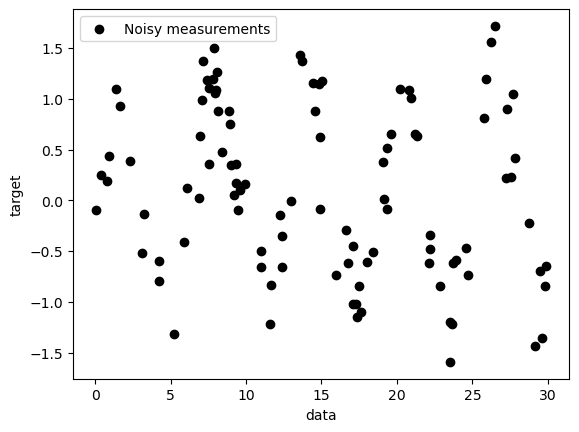

In [2]:
training_sample_indices = rng.choice(np.arange(0, 1000), size=100, replace=False)

training_data = data[training_sample_indices]
training_noisy_target = target[training_sample_indices] + 0.35 * rng.randn(len(training_sample_indices))
print (0.5*rng.randn(len(training_sample_indices)))
print (training_data.shape, training_noisy_target.shape)
plt.scatter(
    training_data,
    training_noisy_target,
    color="black",
    label="Noisy measurements",
)
plt.legend()
plt.xlabel("data");
plt.ylabel("target");

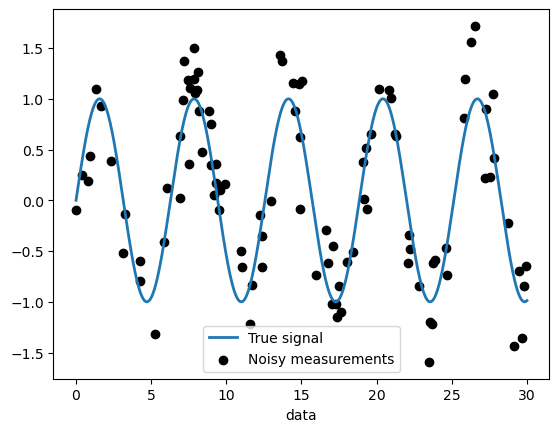

In [5]:
plt.plot(data, target, label="True signal", linewidth=2)
plt.scatter(
    training_data,
    training_noisy_target,
    color="black",
    label="Noisy measurements",
)
plt.legend()
plt.xlabel("data");

In [6]:
import time

from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.kernel_ridge import KernelRidge

kernel_ridge = KernelRidge(kernel=ExpSineSquared())

start_time = time.time()
kernel_ridge.fit(training_data, training_noisy_target)
print(
    f"Fitting KernelRidge with default kernel: {time.time() - start_time:.3f} seconds"
)

Fitting KernelRidge with default kernel: 0.004 seconds


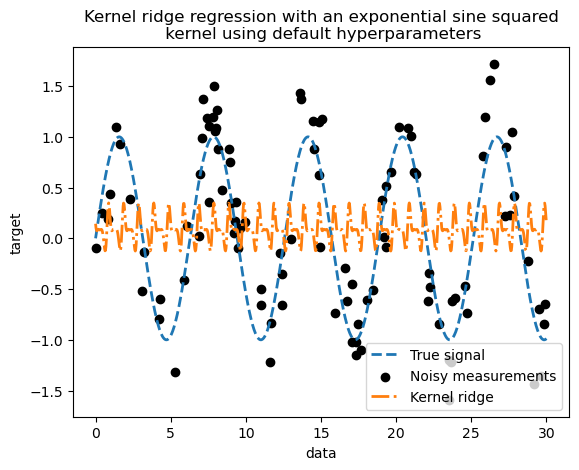

In [7]:
plt.plot(data, target, label="True signal", linewidth=2, linestyle="dashed")
plt.scatter(
    training_data,
    training_noisy_target,
    color="black",
    label="Noisy measurements",
)
plt.plot(
    data,
    kernel_ridge.predict(data),
    label="Kernel ridge",
    linewidth=2,
    linestyle="dashdot",
)
plt.legend(loc="lower right")
plt.xlabel("data")
plt.ylabel("target")
_ = plt.title(
    "Kernel ridge regression with an exponential sine squared\n "
    "kernel using default hyperparameters"
)